# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

# Perceptron Simples

In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Exercício 3 - Perceptron Simples

### Exercicio 1 - Vizualização

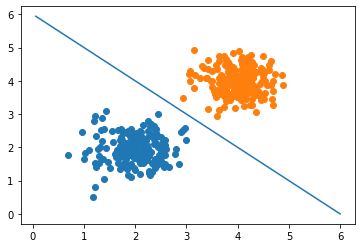

w:  [[ 0.02862559]
 [ 0.0325655 ]
 [-0.17821524]]


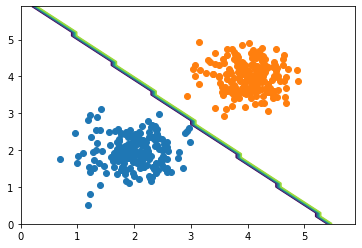

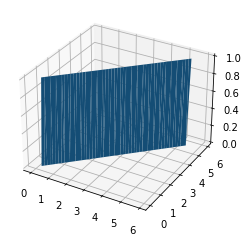

In [36]:
s1 = 0.4
s2 = 0.4
nc = 200
mu, sigma = 0, 4

xc1 = np.random.normal(0, 1, (nc, 2))*s1 + np.full((2, nc), 2).T
xc2 = np.random.normal(0, 1, (nc, 2))*s2 + np.full((2, nc), 4).T

plt.scatter(xc1[:,0], xc1[:,1])
plt.scatter(xc2[:,0], xc2[:,1])

x1_reta = np.arange(6/100, 6, 6/100)
x2_reta = -x1_reta+6

plt.plot(x1_reta, x2_reta)
plt.show()

xc = np.concatenate((xc1, xc2), axis=0)
y1 = np.zeros((nc,1))
y2 = np.ones((nc,1))
y = np.concatenate((y1, y2), axis=0)


# Treinamento do Neuronio
retlist = trainPerceptron(xc,y,0.01,0.01,150,1)

w = retlist[0]
erro = retlist[1]

print("w: ", w)

seqi = np.arange(0,6,0.1)
seqj = np.arange(0,6,0.1)
M =  np.zeros((len(seqi), len(seqj)))
ci = 0

for i in seqi:
    cj=0
    for j in seqj:
        x = np.append([i, j,], 1)
        M[ci][cj] = yPerceptron(x, w, 0)
        cj += 1
    ci += 1

plt.scatter(xc1[:,0], xc1[:,1])
plt.scatter(xc2[:,0], xc2[:,1])
plt.contour(seqi, seqj, M)
plt.show()

ax = plt.axes(projection='3d')
ax.plot_surface(seqi, seqj, M)
    

### Exercicio 2 - Treinamento e Teste

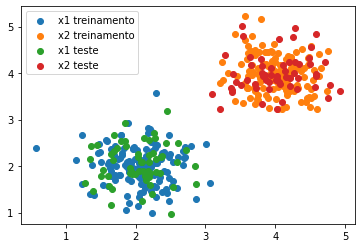

w:  [[ 0.03017948]
 [ 0.08623128]
 [-0.31321346]]

 Acurácia:  98.33333333333333 %

 Matriz de Confusão:
Predito   0   1  All
Real                
0        59   1   60
1         0  60   60
All      59  61  120


In [182]:

# Criando Amostras
s1 = 0.4
s2 = 0.4
mu, sigma = 0, 4

# Escolhendo 0.7*200 = 140 amostrar para treinamento e as outras 60 para teste
xcTrain1 = np.random.normal(0, 1, (140, 2))*s1 + np.full((2, 140), 2).T
xcTrain2 = np.random.normal(0, 1, (140, 2))*s2 + np.full((2, 140), 4).T
xcTest1 = np.random.normal(0, 1, (60, 2))*s1 + np.full((2, 60), 2).T
xcTest2 = np.random.normal(0, 1, (60, 2))*s2 + np.full((2, 60), 4).T

plt.scatter(xcTrain1[:,0], xcTrain1[:,1], label="x1 treinamento")
plt.scatter(xcTrain2[:,0], xcTrain2[:,1], label="x2 treinamento")
plt.scatter(xcTest1[:,0], xcTest1[:,1], label="x1 teste")
plt.scatter(xcTest2[:,0], xcTest2[:,1], label="x2 teste")
plt.legend()
plt.show()

# Treinamento
xcTrain = np.concatenate((xcTrain1, xcTrain2), axis=0)
yTrain1 = np.zeros((140,1))
yTrain2 = np.ones((140,1))
yTrain = np.concatenate((yTrain1, yTrain2), axis=0)

retlist = trainPerceptron(xcTrain,yTrain,0.01,0.01,150,1)

w = retlist[0]
erro = retlist[1]

print("w: ", w)

# Teste
xcTest = np.concatenate((xcTest1, xcTest2), axis=0)
yTest1 = pd.Series(0, index=np.arange(60))
yTest2 = pd.Series(1, index=np.arange(60))
yTest = pd.concat((yTest1, yTest2), axis=0)

yhat = []
for i in xcTest:
    x = np.append(i, 1)
    yhat.append(1.0 * ( w.T @ x >= 0 ))

yhat = pd.Series(yhat).astype(int)
yTest = yTest.reset_index(drop=True)

# Acurácia
yAcuracy = yhat.add(yTest)
sumError = 0
for i in yAcuracy:
    if i == 1:
        sumError += 1

yAcuracy = (60 - sumError)/60 * 100
print("\n Acurácia: ", yAcuracy, "%")


#matriz de confusão
print("\n Matriz de Confusão:")
print(pd.crosstab(yTest, yhat, rownames=['Real'], colnames=['Predito'], margins=True))



### Exercicio 3 - Problemas de Maior Dimensão - Iris

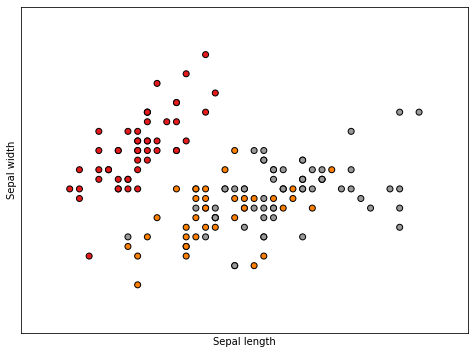

In [184]:

from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

## Treinamento Perceptron

In [2]:
def trainPerceptron(xin, yd, eta, tol, maxepocas, par):
# xin : matriz Nxn com os dados de entrada
# yd: rótulos de saída (0 ou 1)
# eta : passo de treinamento
# tol : tolerância de erro
# maxepocas: número máximo de iterações par : parâmetro de entrada .
# # par=0 ==> xin tem dimensão n+1 e já inclui
# # entrada correspondente ao termo
# # de polarização.
# # par=1 ==> xin tem dimensão n e não inclui

    xin = pd.DataFrame(xin)
    yd = pd.DataFrame(yd)

    nSamples = xin.shape[0]     # Numero de amostras.
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        wt = pd.DataFrame(np.random.sample(nDimension+1) - 0.5)
        xin.insert(nDimension, nDimension, 1)
    else:
        wt = pd.DataFrame(np.random.sample(nDimension) - 0.5)

    nepocas = 0 # Contador de epocas
    eepoca = tol + 1 # Acumulador de erro de epocas

    evec = [maxepocas] # Vetor de erros

    # Laço principal de treinamento
    while (nepocas < maxepocas) & (eepoca > tol):
        ei2 = 0
        #Sequencia aleatória de treinamento
        xseq = np.random.randint(0, nSamples, nSamples)

        for i in range(nSamples):

            # Amostra dado da sequencia aleatória
            irand = xseq[i]

            # Calcula saída do Adaline
            yhati = 1.0 * (np.dot(wt.T, pd.DataFrame(xin.iloc[irand])) >=0)# yhati = xin[i] X wt.T
            yhati = pd.DataFrame(yhati)

            # Calcula erro
            ei = yd.iloc[irand] - yhati        # erro: ei = (yi − yˆi)
            ei = pd.to_numeric(ei[0][0])

            # Calcula variaçao no peso
            dw = eta * (ei * xin.iloc[irand])  # dw = η ei xis
            dw = pd.DataFrame(dw).to_numpy()

            # Ajusta vetor de pesos
            wt = pd.DataFrame(wt).to_numpy()
            wt = wt + dw                     # w(t+1) = w(t) + dw(t) 
            
            # Acumula erro por época
            ei2 += ei**2 

        # Incrementa número de épocas
        nepocas = nepocas + 1
        evec.append(ei2/nSamples)

        # Armazena erro por época
        eepoca = evec[nepocas]

    # Retorna vetores de pesos e de erros
    retlist = [wt, evec[1:nepocas]]

    return retlist

In [118]:
def yPerceptron(xvec, w, par):
# xvec : vetor de entrada
# w: vetor de pesos
# yp: resposta do Perceptron

    xvec = pd.DataFrame(xvec)
    w = pd.DataFrame(w)

    if(par==1):
        xvec = np.append(1, xvec)

    y = 1.0 * ((w.T @ xvec) >= 0)
    
    return y 